### The aim of this project is to predict with the given details that whether an employee would quit the company or not. ie. Attrition happening in the company. Its a clssification problem. Hence suitable algorithms are used.

Steps followed in the project:

1) Importing the packages/libraries

2) Reading the dataset

3) Checking the shape

4) Checking the info

5) Data cleaning( Treating the missing values, dropping unwanted columns/rows)

6) Exploratory data analysis

7) Outlier treatment

8) Label encoding/One hot encoding

9) Defining X and y(independent and dependent variable)

10) Splitting the data into train and test

11) Fitting different models

12) Checking the metrics for model evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

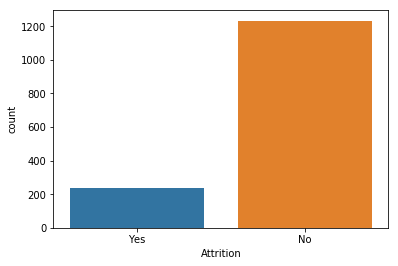

In [5]:
sns.countplot(df.Attrition)
plt.show()

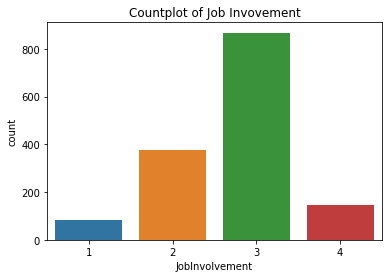

In [6]:
sns.countplot(df.JobInvolvement)
plt.title("Countplot of Job Invovement")
plt.show()

The above barplot shows that most of the employees have high job invovement

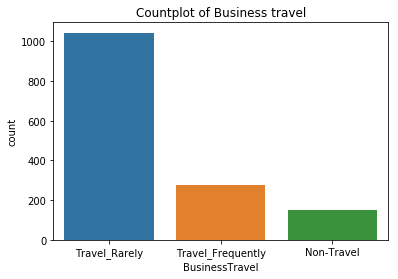

In [7]:
sns.countplot(df.BusinessTravel)
plt.title("Countplot of Business travel")
plt.show()

From the above barplot, it can be seen that most of the employees travel rarely.

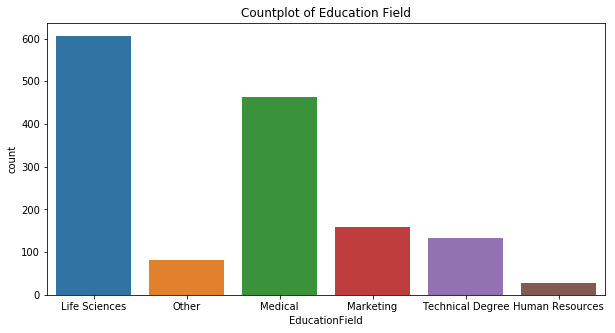

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(df.EducationField)
plt.title("Countplot of Education Field")
plt.show()

From the above barplot, it can be seen that Life sciences and Medical are the prominent education fields of the employees.

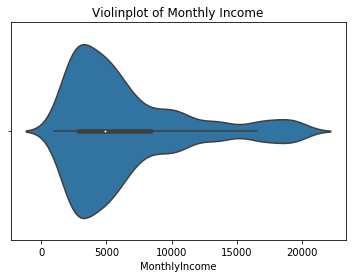

In [9]:
sns.violinplot(df.MonthlyIncome)
plt.title("Violinplot of Monthly Income")
plt.show()

From the above violin plot, it can be observed that most of the employees have monthly income within 7500-8000

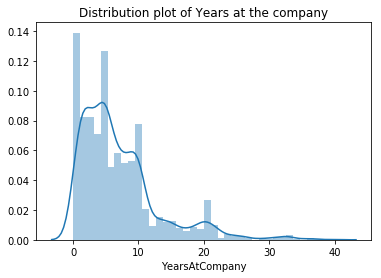

In [10]:
sns.distplot(df.YearsAtCompany)
plt.title("Distribution plot of Years at the company")
plt.show()

From the above distribution plot it can be observed that most of the employees have spent utmost 10 years in the company

In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
df['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

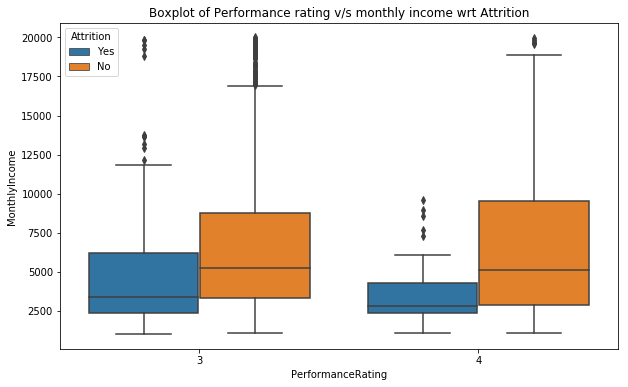

In [13]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Performance rating v/s monthly income wrt Attrition")
sns.boxplot(df['PerformanceRating'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be seen that employees with higher performance rating are leaving the company.

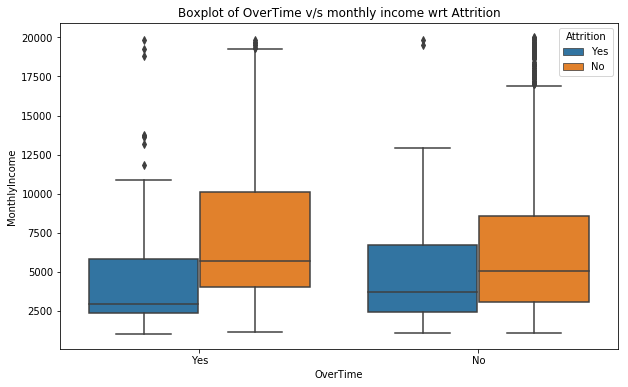

In [14]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of OverTime v/s monthly income wrt Attrition")
sns.boxplot(df['OverTime'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be observed that employees who donot do overtime are still with the company.

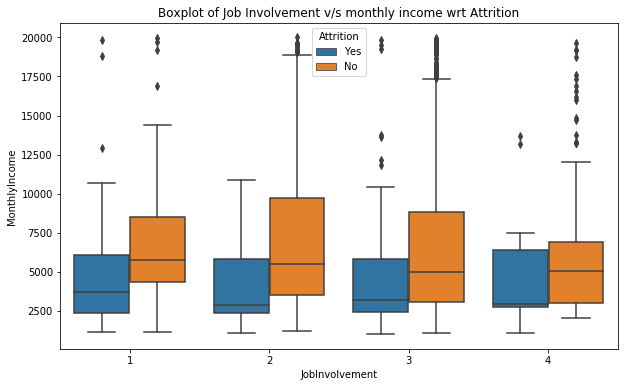

In [15]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Job Involvement v/s monthly income wrt Attrition")
sns.boxplot(df['JobInvolvement'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

Frim the above boxplot it can be seen that employees who show medium invovlement in job have high high attrition rates as compared to others.

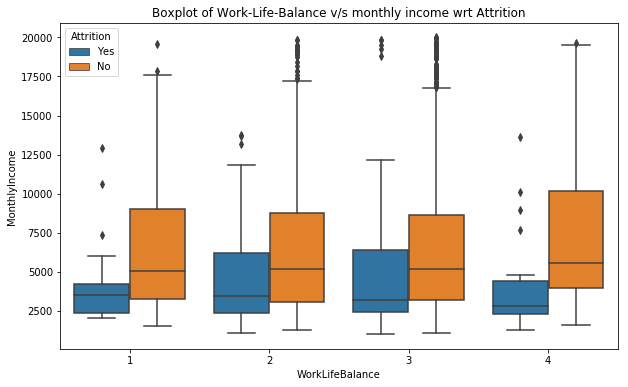

In [16]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Work-Life-Balance v/s monthly income wrt Attrition")
sns.boxplot(df['WorkLifeBalance'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be seen that employees with better work life balance are leaving the company more.

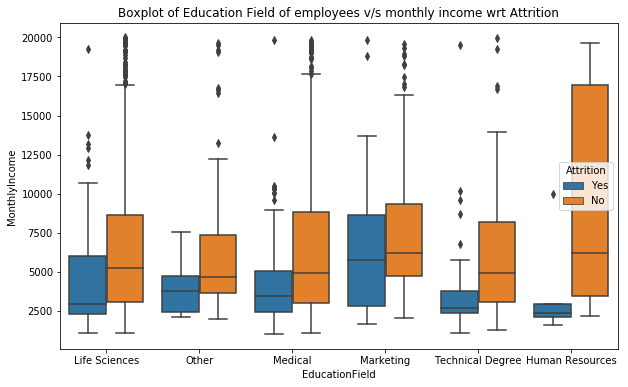

In [17]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Education Field of employees v/s monthly income wrt Attrition")
sns.boxplot(df['EducationField'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be seen that Marketing field has the highest attrition and HR has the lowest attrition. Also HR has the highest pay as compared to other fields.

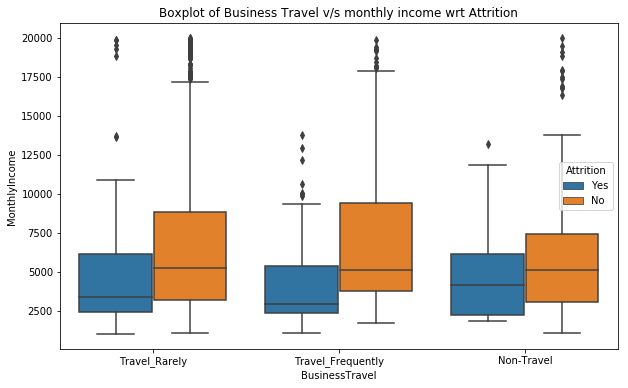

In [18]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Business Travel v/s monthly income wrt Attrition")
sns.boxplot(df['BusinessTravel'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be observed that employees who donot travel have more attrition rate as compared to employees to travel frequently/rarely for business purpose.

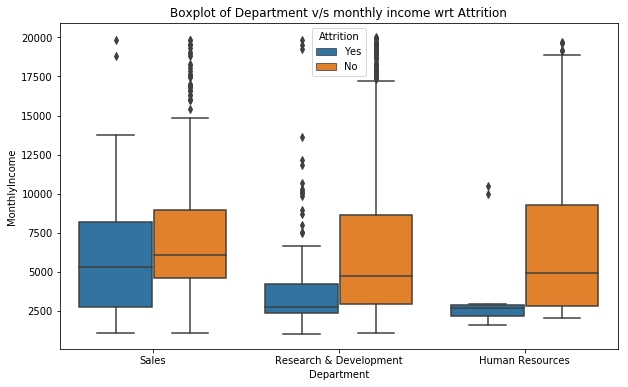

In [19]:
plt.figure(figsize=(10,6))
plt.title("Boxplot of Department v/s monthly income wrt Attrition")
sns.boxplot(df['Department'],df['MonthlyIncome'],hue=df['Attrition'])
plt.show()

From the above boxplot, it can be seen that sales is having the highest attrition as compared to other fields.

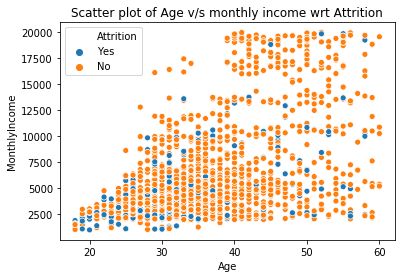

In [20]:
sns.scatterplot(df['Age'],df['MonthlyIncome'],hue=df.Attrition)
plt.title("Scatter plot of Age v/s monthly income wrt Attrition")
plt.show()

From the above scatter plot it can be observed that attrition is slight more among the employees of age below 35 and monthly income below 10,000

In [21]:
#Drop the unnecessary columns
df.drop(['StandardHours','DailyRate','Over18','HourlyRate','MonthlyRate','JobLevel','StockOptionLevel','Education','EmployeeNumber','EmployeeCount'],axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

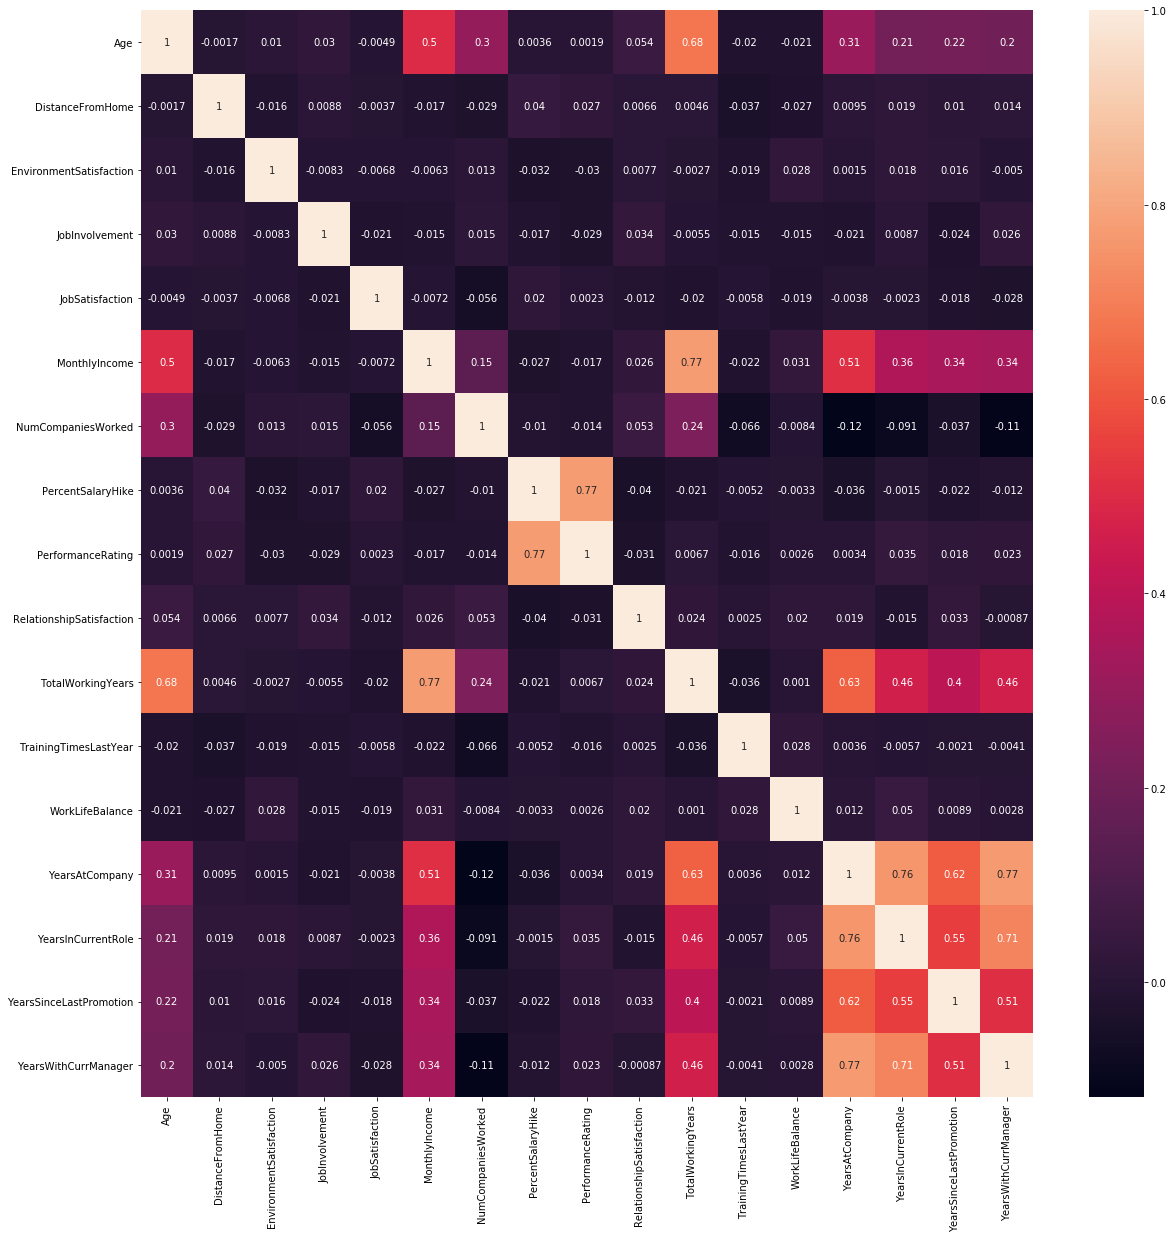

In [22]:
#Checking the correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [24]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [25]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [26]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [27]:
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [28]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

## Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
df['Attrition']=le.fit_transform(df['Attrition'])
le.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,Sales Executive,...,11,3,1,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,Research Scientist,...,23,4,4,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,Laboratory Technician,...,15,3,2,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,Research Scientist,...,11,3,3,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,Medical,1,Male,3,Laboratory Technician,...,12,3,4,6,3,3,2,2,2,2


In [32]:

df['Gender']=le.fit_transform(df['Gender'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['Department']=le.fit_transform(df['Department'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [33]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [34]:
df.select_dtypes(include=['object']).columns

Index(['EducationField', 'JobRole'], dtype='object')

## Get_dummies

In [35]:
status=pd.get_dummies(df['EducationField'],drop_first=True,prefix='Edu_field')
df=pd.concat([df,status],axis=1)
df.drop('EducationField',axis=1,inplace=True)

status=pd.get_dummies(df['JobRole'],drop_first=True,prefix='Job_Role')
df=pd.concat([df,status],axis=1)
df.drop('JobRole',axis=1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
Age                                1470 non-null int64
Attrition                          1470 non-null int32
BusinessTravel                     1470 non-null int32
Department                         1470 non-null int32
DistanceFromHome                   1470 non-null int64
EnvironmentSatisfaction            1470 non-null int64
Gender                             1470 non-null int32
JobInvolvement                     1470 non-null int64
JobSatisfaction                    1470 non-null int64
MaritalStatus                      1470 non-null int32
MonthlyIncome                      1470 non-null int64
NumCompaniesWorked                 1470 non-null int64
OverTime                           1470 non-null int32
PercentSalaryHike                  1470 non-null int64
PerformanceRating                  1470 non-null int64
RelationshipSatisfaction           1470 non-null int64
TotalWorkingY

## Define X and y

In [37]:
X=df.drop('Attrition',axis=1)
X.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Edu_field_Life Sciences', 'Edu_field_Marketing', 'Edu_field_Medical',
       'Edu_field_Other', 'Edu_field_Technical Degree',
       'Job_Role_Human Resources', 'Job_Role_Laboratory Technician',
       'Job_Role_Manager', 'Job_Role_Manufacturing Director',
       'Job_Role_Research Director', 'Job_Role_Research Scientist',
       'Job_Role_Sales Executive', 'Job_Role_Sales Representative'],
      dtype='object')

In [38]:
y=df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Splitting the data into train and test

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=102)

## Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [41]:
#fitting the model to train data
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
y_pred_train=lr.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
print("\n Accuracy score using logistic regression for train data:", accuracy_score(y_train,y_pred_train))

print("\n Confusion matrix using logistic regression for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classifiaction report for logistice regression for train data:\n",classification_report(y_train,y_pred_train))


 Accuracy score using logistic regression for train data: 0.8824101068999028

 Confusion matrix using logistic regression for train data:
 [[846  20]
 [101  62]]

 Classifiaction report for logistice regression for train data:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       866
           1       0.76      0.38      0.51       163

   micro avg       0.88      0.88      0.88      1029
   macro avg       0.82      0.68      0.72      1029
weighted avg       0.87      0.88      0.87      1029



In [45]:
#Prediction for test data
y_pred_test=lr.predict(X_test)

In [46]:
print("\n Accuracy score using logistic regression for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using logistic regression for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classifiaction report for logistice regression for test data:\n",classification_report(y_test,y_pred_test))


 Accuracy score using logistic regression for test data: 0.8684807256235828

 Confusion matrix using logistic regression for test data:
 [[359   8]
 [ 50  24]]

 Classifiaction report for logistice regression for test data:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       367
           1       0.75      0.32      0.45        74

   micro avg       0.87      0.87      0.87       441
   macro avg       0.81      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441



## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini')

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
y_pred_train=rfc.predict(X_train)

In [50]:
print("Accuracy score using Random forest for train data:", accuracy_score(y_train,y_pred_train))
print("\n Confusion matrix using Random Forest for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classification report using Random Forest for train data:\n",classification_report(y_train,y_pred_train))

Accuracy score using Random forest for train data: 0.9805636540330418

 Confusion matrix using Random Forest for train data:
 [[866   0]
 [ 20 143]]

 Classification report using Random Forest for train data:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       866
           1       1.00      0.88      0.93       163

   micro avg       0.98      0.98      0.98      1029
   macro avg       0.99      0.94      0.96      1029
weighted avg       0.98      0.98      0.98      1029



In [51]:
y_pred_test=rfc.predict(X_test)

In [52]:
print("Accuracy score using Random Forest for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using Random Forest for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classification report using Random Forest for test data:\n",classification_report(y_test,y_pred_test))

Accuracy score using Random Forest for test data: 0.8412698412698413

 Confusion matrix using Random Forest for test data:
 [[360   7]
 [ 63  11]]

 Classification report using Random Forest for test data:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       367
           1       0.61      0.15      0.24        74

   micro avg       0.84      0.84      0.84       441
   macro avg       0.73      0.56      0.58       441
weighted avg       0.81      0.84      0.80       441



## AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(learning_rate=0.7,random_state=101)

In [54]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=50, random_state=101)

In [55]:
y_pred_train=ada.predict(X_train)

In [56]:
print("Accuracy score using AdaBoost for train data:", accuracy_score(y_train,y_pred_train))
print("n Confusion matrix using AdaBoost for train data:\n",confusion_matrix(y_train,y_pred_train))
print("\n Classification report using AdaBoost for train data:\n",classification_report(y_train,y_pred_train))

Accuracy score using AdaBoost for train data: 0.8950437317784257
n Confusion matrix using AdaBoost for train data:
 [[858   8]
 [100  63]]

 Classification report using AdaBoost for train data:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       866
           1       0.89      0.39      0.54       163

   micro avg       0.90      0.90      0.90      1029
   macro avg       0.89      0.69      0.74      1029
weighted avg       0.89      0.90      0.88      1029



In [57]:
y_pred_test=ada.predict(X_test)

In [58]:
print("Accuracy score using AdaBoost for test data:", accuracy_score(y_test,y_pred_test))
print("\n Confusion matrix using AdaBoost for test data:\n",confusion_matrix(y_test,y_pred_test))
print("\n Classification report using AdaBoost for test data:\n",classification_report(y_test,y_pred_test))

Accuracy score using AdaBoost for test data: 0.891156462585034

 Confusion matrix using AdaBoost for test data:
 [[362   5]
 [ 43  31]]

 Classification report using AdaBoost for test data:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       367
           1       0.86      0.42      0.56        74

   micro avg       0.89      0.89      0.89       441
   macro avg       0.88      0.70      0.75       441
weighted avg       0.89      0.89      0.88       441



## ROC and AUC for above algorithms

#### For AdaBoost

In [59]:
import sklearn.metrics as metrics
probs = ada.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

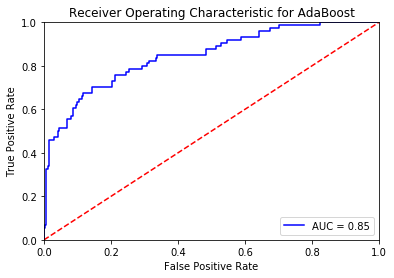

In [60]:
plt.title('Receiver Operating Characteristic for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### For Random Forest

In [61]:
import sklearn.metrics as metrics
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

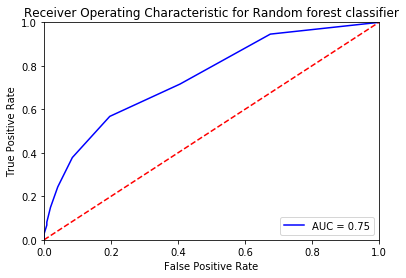

In [62]:
plt.title('Receiver Operating Characteristic for Random forest classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### For logistic regression

In [63]:
import sklearn.metrics as metrics
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

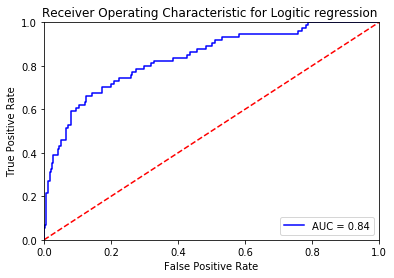

In [64]:
plt.title('Receiver Operating Characteristic for Logitic regression ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### By observing the accuracy score, confusion matrix, precision, recall, f1 score and AUC and ROC for different algorithms,Adaboost can be considered as the best model as its having high accuracy, recall,precision and also AUC is greater in Adaboost model as compared to other two algorithms.

## Serialization

In [65]:
import pickle
hr_analytics_model = pickle.dumps(ada)
 

In [66]:
ada_from_pickle = pickle.loads(hr_analytics_model)

In [67]:
ada_from_pickle.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Findings from the project

1) Most of the employees travel rarely.

2) From the given data, it can be found that most of the employees are from life sciences and medical field.

3) Monthly income of most employees is within 10,000 units.

4) Very few employees are working in the company from past 20- 40 years. Most of them have been with the company with utmost 10 years.

5) Employees having higher performance rating are leaving the company(This interpretation may be only limited to this data).

6) Attrition is more among employees who work overtime.

7) Marketing field has the highest attrition while HR field is having the lowest attrition.

8) Employee who donot travel are more prone of leaving the company.

9) Attrition is more among employees of age less than 35 and who are having a monthly income less than 10,000 units.


## Oversampling

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
sm=SMOTE(sampling_strategy='minority',random_state=7)

In [70]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('Attrition', axis=1), df['Attrition'])

In [71]:
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [72]:
oversampled_train.columns = df.columns

In [73]:
lr.fit(oversampled_trainX,oversampled_trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
y_pred_oversamtrain=lr.predict(oversampled_trainX)

In [75]:
accuracy_score(oversampled_trainY,y_pred_oversamtrain)

0.8645579886455799